# Data Importing

In [9]:
import pandas as pd
import csv
import numpy as np

In [10]:
data = pd.read_csv("/Users/sonalichaudhari/Desktop/Churning/Data/Final_data.csv")
data.shape

(7032, 21)

In [11]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,Tenure(0-12),No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,Tenure(24-48),Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,Tenure(0-12),Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,Tenure(24-48),No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,Tenure(0-12),Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA ANALYSIS

In [12]:
# Separating the data by churn column

churn = data[data.Churn=='Yes']
non_churn = data[data.Churn=="No"]

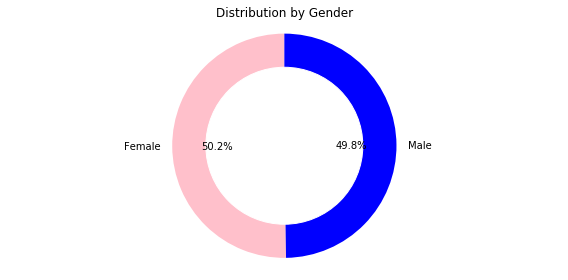

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))
 
# create data
s = churn['gender'].value_counts().to_frame().reset_index()
names= list(s['index'])
size=list(s['gender'])
 

# Create a circle for the center of the plot
my_circle =plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names,autopct='%1.1f%%', colors=['pink','blue'], startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)

ax.set_title("Distribution by Gender")
plt.axis('equal')
plt.tight_layout()
plt.show()

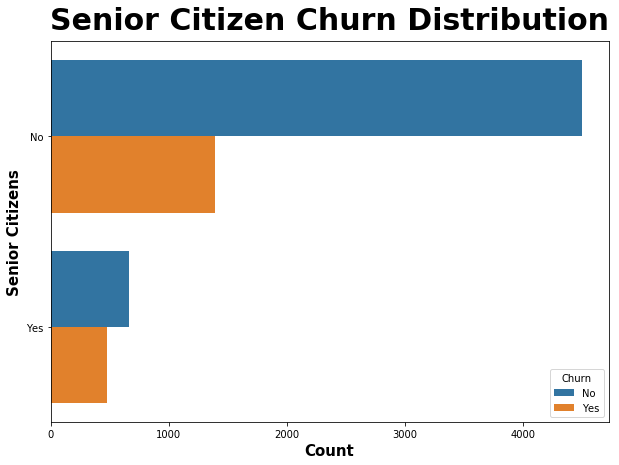

In [30]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(y="SeniorCitizen", hue='Churn', data=data)

plt.title('Senior Citizen Churn Distribution',fontsize=30,fontweight="bold", va='bottom')
plt.xlabel('Count',fontsize=15,fontweight="bold")
plt.ylabel('Senior Citizens',fontsize=15,fontweight="bold")
plt.show()

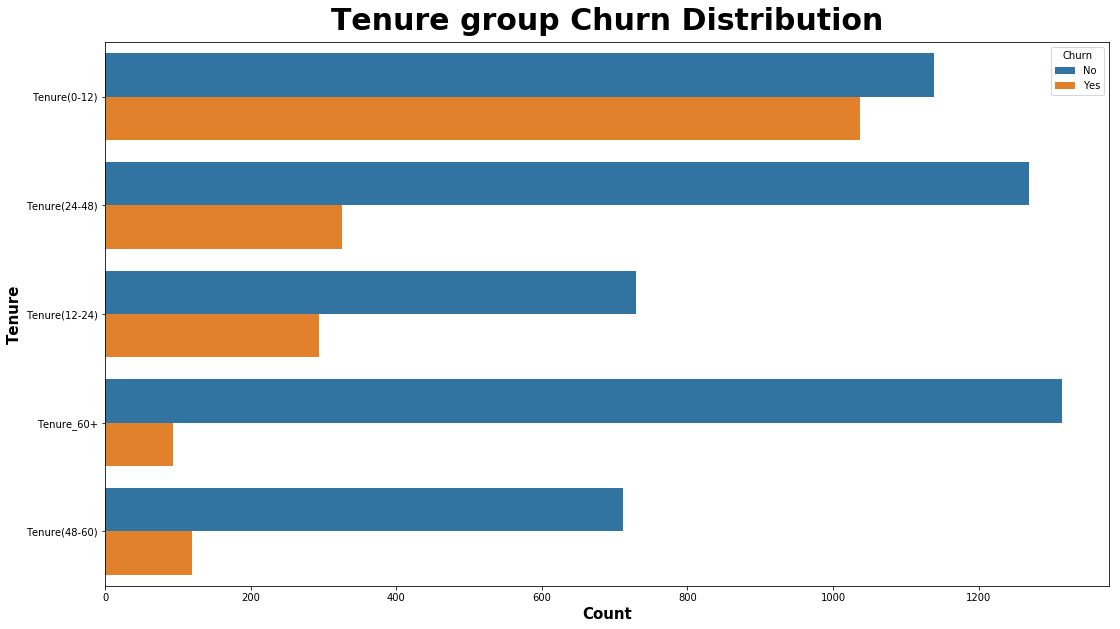

In [31]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(y="Tenure_slot", hue='Churn', data=data)

plt.title('Tenure group Churn Distribution',fontsize=30,fontweight="bold", va='bottom')
plt.xlabel('Count',fontsize=15,fontweight="bold")
plt.ylabel('Tenure',fontsize=15,fontweight="bold")
plt.show()

In [38]:
data[data.columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


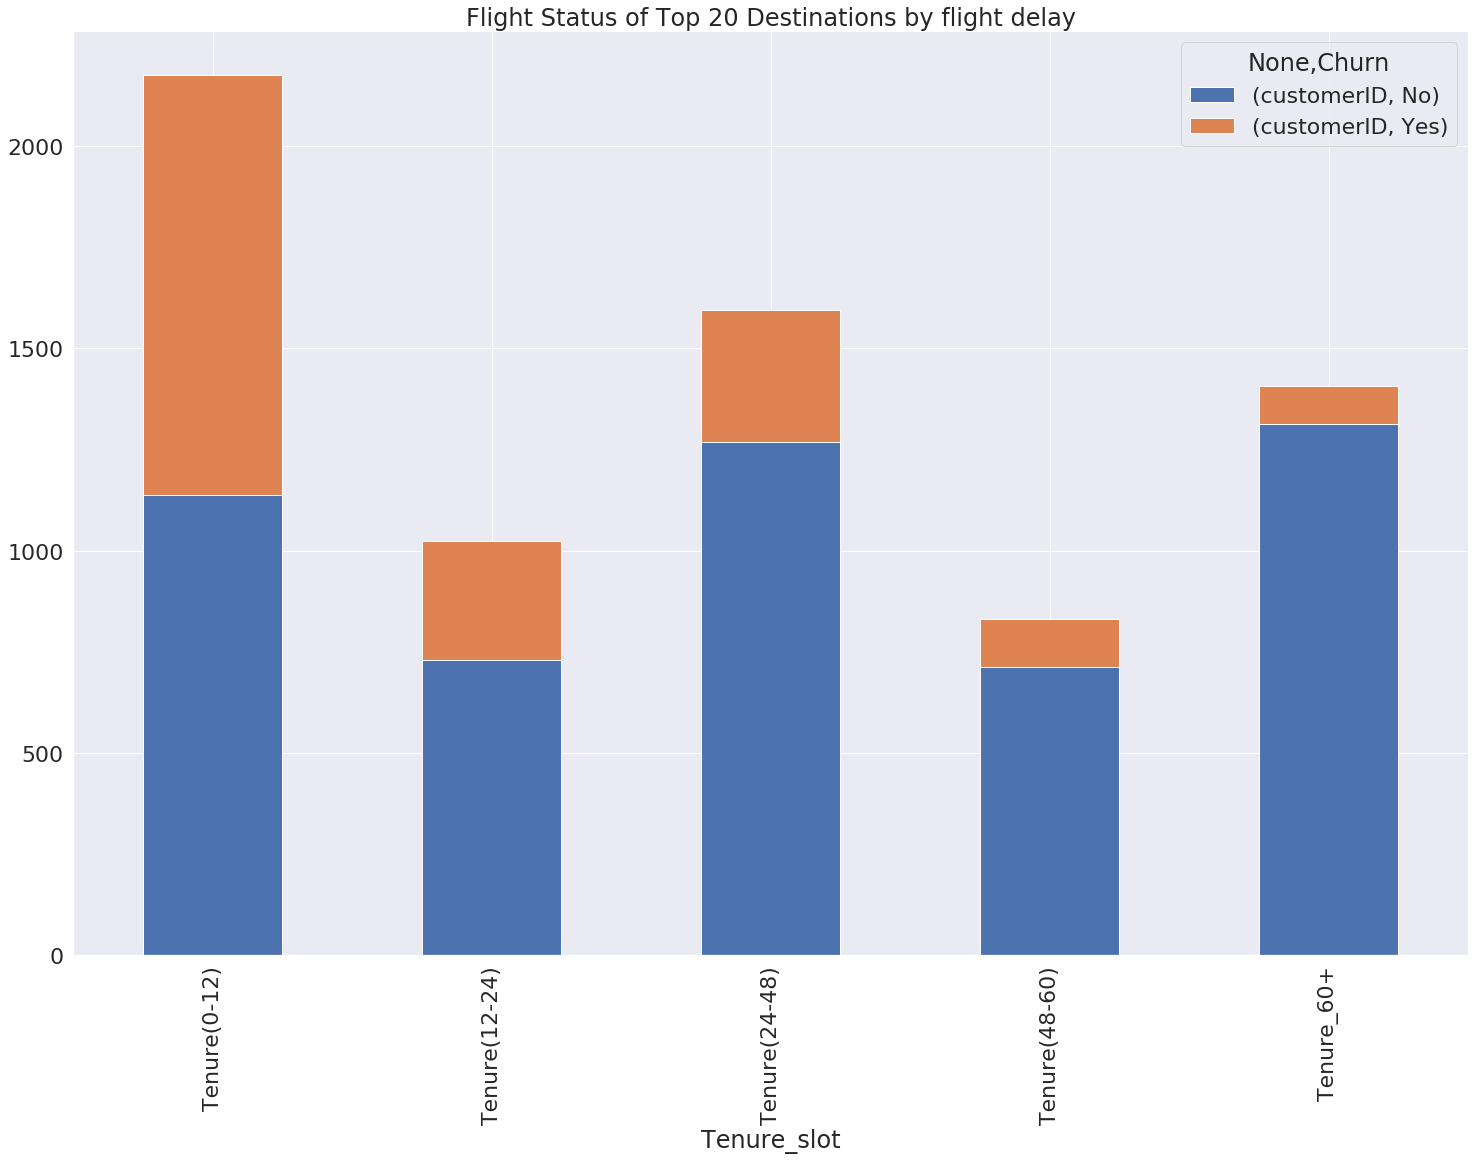

In [80]:
df = data
s = df.pivot_table(values=['customerID'], index='Tenure_slot', columns='Churn', aggfunc=lambda x: len(x)).reset_index()
s = s.set_index('Tenure_slot')
s.plot(kind='bar',stacked=True,title="Flight Status of Top 20 Destinations by flight delay",legend=True,figsize = (25,17))
plt.show()

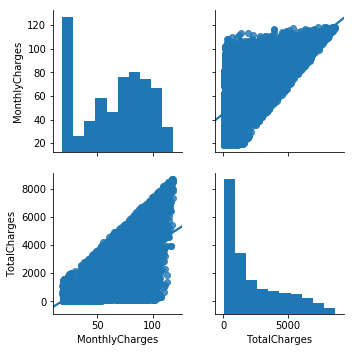

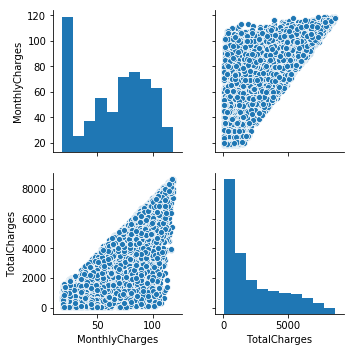

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# with regression
sns.pairplot(data, kind="reg")
plt.show()
 
# without regression
sns.pairplot(data, kind="scatter")
plt.show()

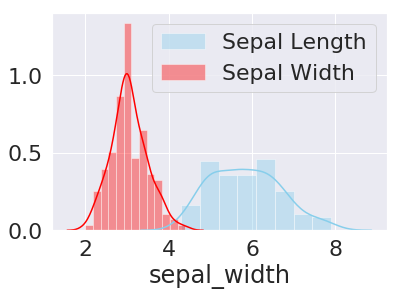

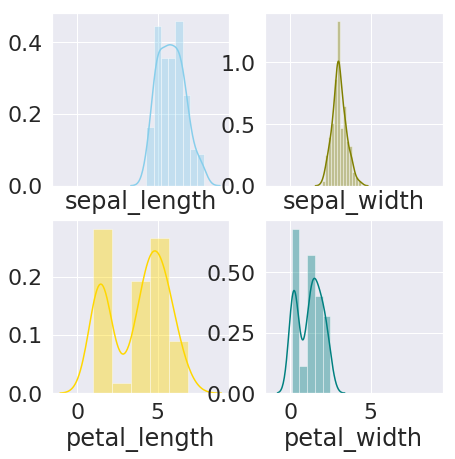

In [92]:
import seaborn as sns
df = sns.load_dataset('iris')
 
# Method 1: on the same Axis
sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
plt.legend()
 
plt.show()
 

# library and data
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])

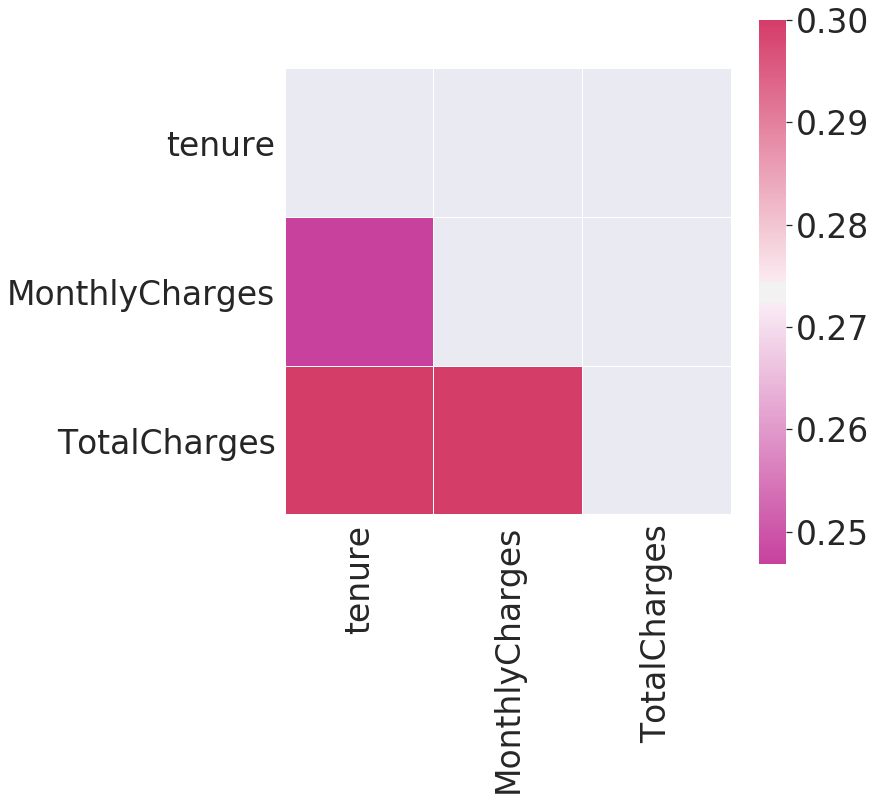

In [95]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale = 3)
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(330, 0, as_cmap=True),square=True, linewidths=.5,vmax=0.3,ax=ax, cbar_kws={"shrink": 1})

plt.show()

In [26]:
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
color = sns.color_palette()

ImportError: No module named 'pandas_profiling'

In [29]:
telcom = data
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [31]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)